<a href="https://colab.research.google.com/github/palisthadeshar/Tasks/blob/main/rectangle_numbering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow




In [ ]:
def find_rectangles(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edges image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rectangles = []

    # Iterate through the contours to find rectangles
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        #finding rectangles
        if len(approx) == 4:
            rectangles.append(approx)

    return rectangles

def find_lines(image_path,rectangles):
  image = cv2.imread(image_path)
  rectangles=find_rectangles(image_path)
  for rectangle in rectangles:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Draw the rectangle on the image
        cv2.drawContours(image, [rectangle], -1, (0, 255, 0), 2)

        # Apply Canny edge detection to find lines inside rectangle
        edges = cv2.Canny(gray, 50, 150)

        # Apply Hough Line Transform
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
        # Filter out lines that inside the rectangle
        filtered_lines = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Check line length or angle to filter out rectangle lines
            if abs(x2 - x1) > 10 or abs(y2 - y1) > 10:
                filtered_lines.append(line)

        # Draw the remaining lines on the image
        for line in filtered_lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
  cv2_imshow(image)
  return filtered_lines



Saving rectangle.JPG to rectangle (11).JPG


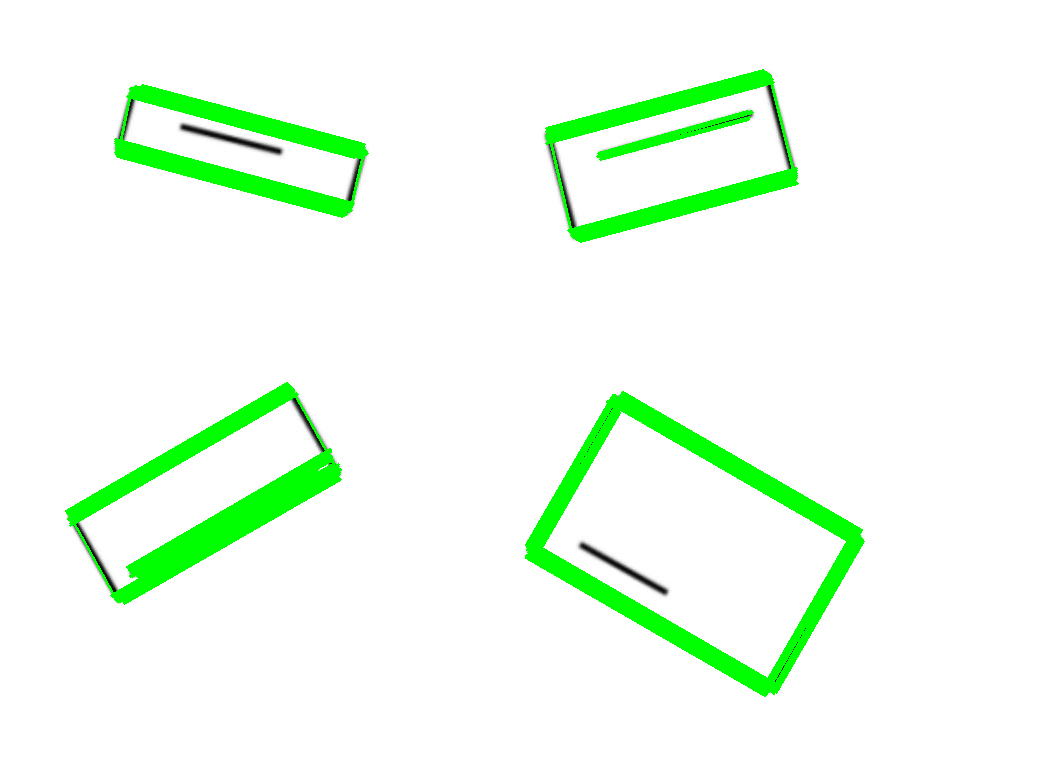

Number of rectangles found: 4
Number of lines inside rectangle found: 20


In [ ]:
if __name__ == '__main__':
    # Upload the image to Colab
    uploaded = files.upload()

    # Get the uploaded image file name
    image_filename = next(iter(uploaded))

    # Find all the rectangles in the image
    rectangles = find_rectangles(image_filename)
    number_lines = find_lines(image_filename,rectangles)
    print(f"Number of rectangles found: {len(rectangles)}")
    print(f"Number of lines inside rectangle found: {len(number_lines)}")
